In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
df = pd.read_csv('Dataframe in Tableview CSV.csv')

In [3]:
# Extract year from Cohort and convert to integer
df['Year'] = df['Cohort'].astype(str).str[:2].astype(int) + 2000

In [4]:
# Group by Year and count students
student_counts = df.groupby('Year').size().reset_index(name='Count')

In [5]:
# Calculate gender ratios
gender_ratios = df.groupby('Year')['Gender'].value_counts(normalize=True).unstack()

In [6]:
# Add faculty requirement feature (1 if requirement is present, 0 otherwise)
student_counts['FacultyRequirement'] = np.where(student_counts['Year'].isin([2023, 2024]), 1, 0)

In [7]:
# Add job vacancies feature
job_vacancies = {
    2019: 4170,
    2020: 3800,
    2021: 6510,
    2022: 7750,
    2023: 7920
}
student_counts['JobVacancies'] = student_counts['Year'].map(job_vacancies).fillna(0)

In [8]:
# Prepare data for linear regression
X = student_counts[['Year', 'FacultyRequirement', 'JobVacancies']]
y_count = student_counts['Count']
y_male_ratio = gender_ratios['M']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_count_train, y_count_test = train_test_split(X, y_count, test_size=0.2, random_state=42)
_, _, y_male_ratio_train, y_male_ratio_test = train_test_split(X, y_male_ratio, test_size=0.2, random_state=42)

In [10]:
# Train Linear Regression models
model_count = LinearRegression().fit(X_train, y_count_train)
model_male_ratio = LinearRegression().fit(X_train, y_male_ratio_train)

In [11]:
# Train Decision Tree models
tree_count = DecisionTreeRegressor(random_state=42).fit(X_train, y_count_train)
tree_male_ratio = DecisionTreeRegressor(random_state=42).fit(X_train, y_male_ratio_train)

In [12]:
# Train Random Forest models
forest_count = RandomForestRegressor(random_state=42).fit(X_train, y_count_train)
forest_male_ratio = RandomForestRegressor(random_state=42).fit(X_train, y_male_ratio_train)

In [13]:
# Predict on the test set
lr_count_pred = model_count.predict(X_test)
lr_male_ratio_pred = model_male_ratio.predict(X_test)
tree_count_pred = tree_count.predict(X_test)
tree_male_ratio_pred = tree_male_ratio.predict(X_test)
forest_count_pred = forest_count.predict(X_test)
forest_male_ratio_pred = forest_male_ratio.predict(X_test)

In [19]:
# Calculate Mean Squared Error
mse_lr_count = mean_squared_error(y_count_test, lr_count_pred)
mse_tree_count = mean_squared_error(y_count_test, tree_count_pred)
mse_forest_count = mean_squared_error(y_count_test, forest_count_pred)
mse_lr_male_ratio = mean_squared_error(y_male_ratio_test, lr_male_ratio_pred)
mse_tree_male_ratio = mean_squared_error(y_male_ratio_test, tree_male_ratio_pred)
mse_forest_male_ratio = mean_squared_error(y_male_ratio_test, forest_male_ratio_pred)

print("MSE Linear Regression Count:", mse_lr_count)
print("MSE Decision Tree Count:", mse_tree_count)
print("MSE Random Forest Count:", mse_forest_count)
print("MSE Linear Regression Male Ratio:", mse_lr_male_ratio)
print("MSE Decision Tree Male Ratio:", mse_tree_male_ratio)
print("MSE Random Forest Male Ratio:", mse_forest_male_ratio)

MSE Linear Regression Count: 95.47260233198081
MSE Decision Tree Count: 123.25
MSE Random Forest Count: 166.51742500000003
MSE Linear Regression Male Ratio: 0.023208482547708083
MSE Decision Tree Male Ratio: 0.01582561667937392
MSE Random Forest Male Ratio: 0.019532151945487287


In [21]:
# Select the best model for future predictions
best_model_count = model_count  # Linear Regression performed best for count
best_model_male_ratio = tree_male_ratio  # Decision Tree Model performed best for male ratio

In [22]:
# Predict future values
future_years = np.array(range(student_counts['Year'].max() + 1, student_counts['Year'].max() + 6))
future_faculty_requirement = np.where((future_years == 2024) | (future_years == 2025), 1, 0)
future_job_vacancies = [7920, 8000, 8100, 8200, 8300]  # Adjusted future job vacancies data

future_data = pd.DataFrame({
    'Year': future_years,
    'FacultyRequirement': future_faculty_requirement,
    'JobVacancies': future_job_vacancies
})

predicted_counts = best_model_count.predict(future_data)
predicted_male_ratios = best_model_male_ratio.predict(future_data)

print("Predicted Counts:", predicted_counts)
print("Predicted Male Ratios:", predicted_male_ratios)

Predicted Counts: [151.66056718 152.67220786  72.05417043  73.15357949  74.25298854]
Predicted Male Ratios: [0.11258278 0.11258278 0.11258278 0.11258278 0.11258278]


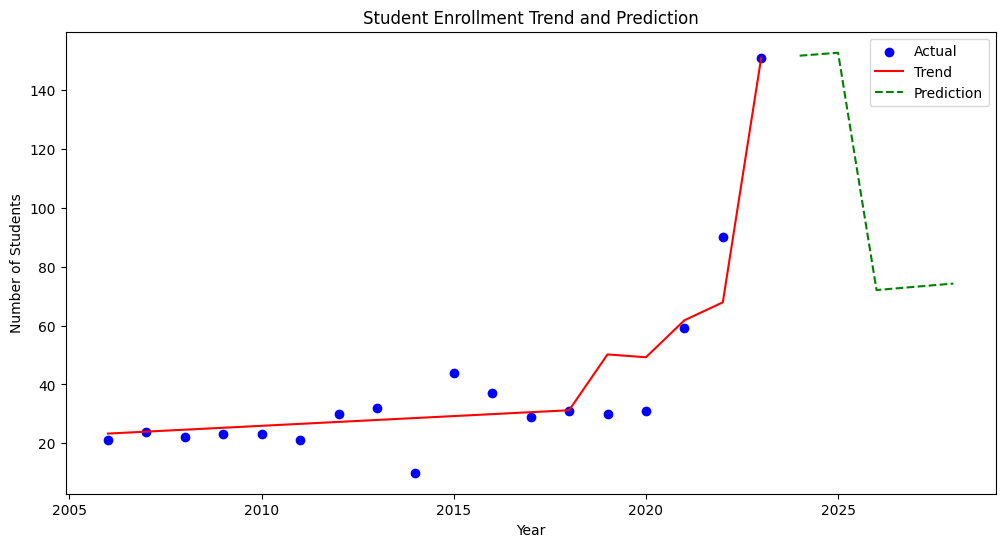

In [23]:
# Visualize student count trend
plt.figure(figsize=(12, 6))
plt.scatter(student_counts['Year'], student_counts['Count'], color='blue', label='Actual')
plt.plot(student_counts['Year'], model_count.predict(X), color='red', label='Trend')
plt.plot(future_years, predicted_counts, color='green', linestyle='--', label='Prediction')
plt.title('Student Enrollment Trend and Prediction')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

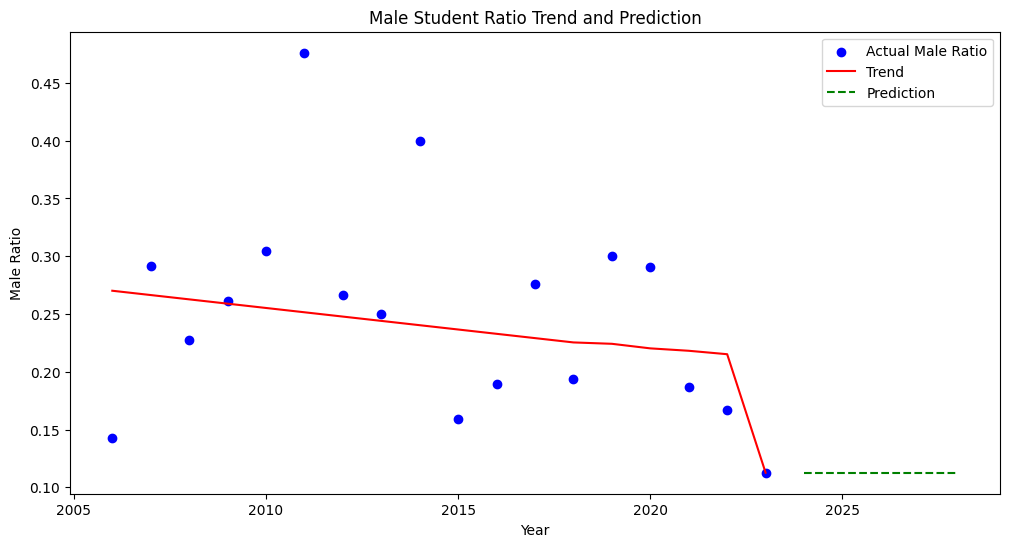

In [24]:
# Visualize gender ratio trend
plt.figure(figsize=(12, 6))
plt.scatter(gender_ratios.index, gender_ratios['M'], color='blue', label='Actual Male Ratio')
plt.plot(gender_ratios.index, model_male_ratio.predict(X), color='red', label='Trend')
plt.plot(future_years, predicted_male_ratios, color='green', linestyle='--', label='Prediction')
plt.title('Male Student Ratio Trend and Prediction')
plt.xlabel('Year')
plt.ylabel('Male Ratio')
plt.legend()
plt.show()